# 2장 머신러닝 프로젝트 처음부터 끝까지

#### * 진행할 주요단계

1. 큰그림 보기
2. 데이터 구하기
3. 데이터로부터 인사이트를 얻기 위해 탐색, 시각화
4. 머신러닝 알고리즘을 위해 데이터 준비
5. 모델을 선택하고 훈련
6. 모델을 상세하게 조정
7. 솔루션 제시
8. 시스템을 론칭하고 모니터링, 유지 보수

### California housing data

#### 1. 문제정의
모델만들기가 비즈니스 목적은 아니다.. 회사에서는 이 모델을 사용해서 어떻게 이익을 얻을려고 할까 이는 문제를 어떻게 구성할지 어떤 알고리즘을 선택할지 모델 평가에 어떤 성능지표를 사용할지 모델튜닝을 위해 얼마나 노력을 투여할지 결정한다.

California housing data는 레이블된 훈련 샘플이 있으니 전형적인 지도학습이다.  
또한 값을 예측해야하므로 전형적인 회귀문제이다.  
좀 더 구체적으로는 feature가 여러개이므로 다변량 회귀문제이다.

#### 2. 성능 측정 지표 선택

회귀문제에서는 RMSE가 일반적으로 사용되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수도 있다.  
예를 들면 이상치로 보이는 구역이 많으면 MAE(평균 절대 오차)를 고려해볼 수도 있다.  
RMSE가 MAE에 비해 이상치에더 민감하다.  
이상치가 드물다면 RMSE가 잘 맞아 일반적으로 많이 사용된다.  

#### 3.가정 검사
예를들면 데이터의 target은 회귀문제인데 비즈니스 문제에서 필요한 output이 분류문제인 경우가 있다.  
본격적인 분석에 앞서 위와 같은 가정들을 잘 검사할 필요가 있다

### 데이터 다운로드

In [13]:
import os
import tarfile

from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" ##데이터 다운로드 받을 곳의 주소 root
HOUSING_PATH = os.path.join("datasets", "housing") ##저장경로
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" ## root + 다운로드파일 경로

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): ##내 os에 housing_path 경로 유무 검사
        os.makedirs(housing_path) ## 만약 없다면 다음과같은 경로를 만들어줌
    tgz_path = os.path.join(housing_path, "housing_tgz") ##경로 + housing_tgz
    urllib.request.urlretrieve(housing_url, tgz_path) ## url경로 + 경로 + housing_tgz 다운로드
    housing_tgz = tarfile.open(tgz_path) #tarfile.open은 tgz압축파일을 open
    housing_tgz.extractall(path=housing_path) # os 경로에 압축해제
    housing_tgz.close() #압축파일 close
fetch_housing_data() #함수호출

In [14]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv") #housing_path + housing.csv 새경로 생성 및 csv_path에 할당
    return pd.read_csv(csv_path) #해당 path를 pandas로 읽어들임

### 데이터 훑어보기

In [15]:
housing = load_housing_data()
housing.head() #위 다섯개 데이터

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing.info() # 데이터에 대한 요약정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
housing.ocean_proximity.value_counts() ##범주형 변수임을 확인

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
housing.describe() #수치형 변수들에 대해서만 요약 정보

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


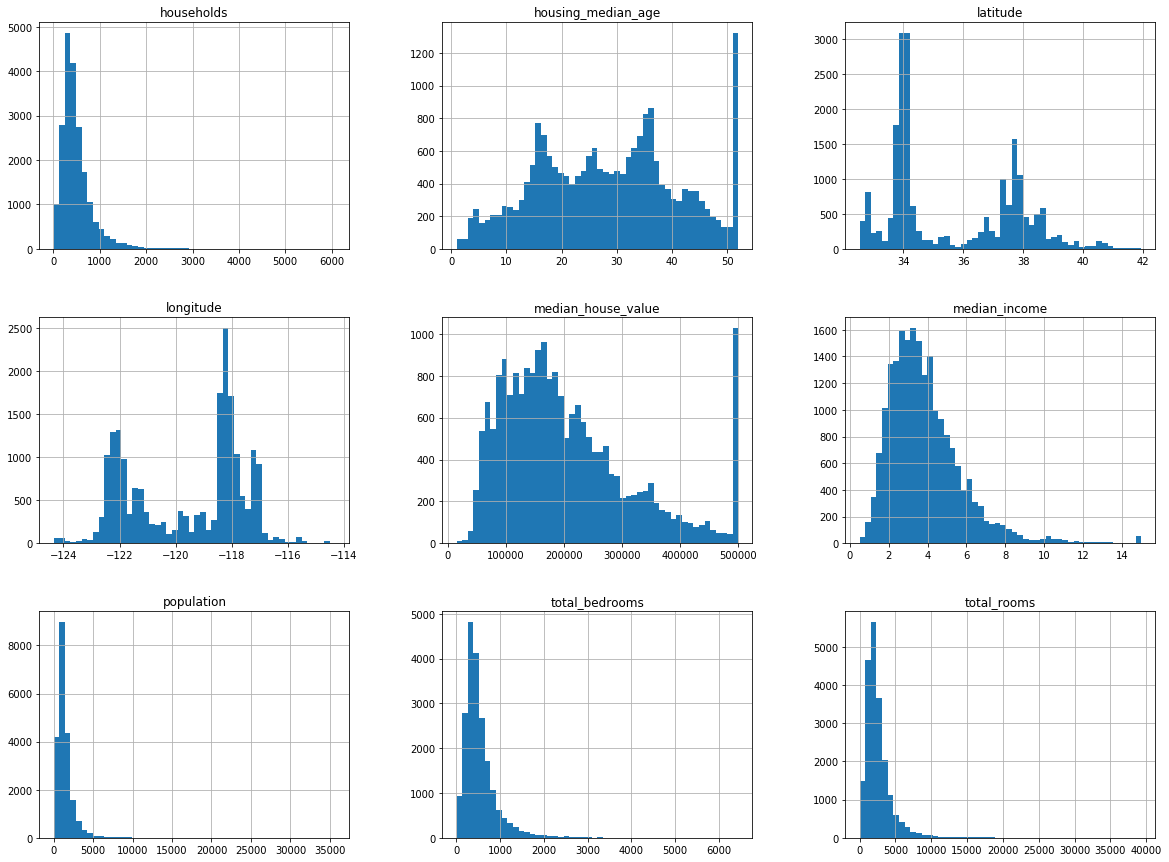

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### 히스토그램을 통한 데이터 파악
- median income은 US달러로 표시되어 있는것 같지않다. 실제로는 0.5~15사이로 스케일링한 데이터이다.  
- hosing median age와 median_house_value 도 마찬가지로 최대값과 최소값을 한정하였다. 특히 median_house_value는 target이 될 값이므로 문제점이 생길수있다(머신러닝 알고리즘이 한계값을 넘지않도록 학습할 수 도 있음) 이는 클라이언트와 논의해야할 사항이며 정확한 예측이 필요하다면 a. 한곗값 밖의 구역에 대한 정확한 레이블을 구하거나 b. 훈련세트에서 이러한 구역들을 제거한다)
- 특성들의 스케일링 단위가 많이 다르다
- 히스토그램의 꼬리가 두껍다 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 힘들게한다. 좀 더 종모양의 분포를 가지도록 스케일링 해주도록하자.

### 테스트 세트 만들기
그냥 처음부터 테스트 세트 빼놓고 들여다보지도 말 것!  -> 데이터 스누핑 편항 일어날 수 있음

In [20]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


numpy로 작성한 split_train_test 함수는 겉보기에는 별 문제 없어보이지만 문제점을 가지고있다.  
프로그램을 다시 실행하면 다른 테스트 셋이 만들어진다.  
이에 대한 해결책으로
1. 처음 실행에서 테스트 세트를 저장하고 다음 실행에서 이를 불러들이는 방법 
2. np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 방법(예를들면, np.random.seed(42))


사이킷런 에서는 데이터셋을 여러 서브셋으로 나누는 다양한 방법을 제공한다. 그냥 사이킷런 쓰면된다!

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

데이터셋의 크기가 충분히 크다면 (feature 수에 비해) 상관없지만 그렇지 않으면 샘플링 편향이 생길 수 있다. 이때 다양한 집단의 특성을 반영할 수 있는 계층적 샘플링(stratified sampling)을 이용해야한다.  
예를들어 median_income이 median_house_price를 예측하는데 매우 중요하다면 테스트 세트가 전체 데이터 셋에 있는 여러 소득 카테고리를 잘 대표해야만 한다. 중간소득(median_income)은 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야만 한다.  
다음 코드는 중간 소득(median_income)을 1.5로 나누고(소득 카테고리 수를 제한하기 위해), ceil함수를 사용하여 오림해서 소득 카테고리 특성을 만들고(이산적인 카테코리를 만들기위해), 5보다 큰 카테고리는 5로 합친다.

In [22]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] <5, 5.0, inplace = True)

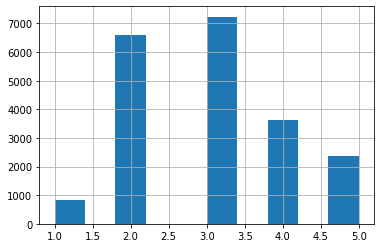

In [23]:
housing["income_cat"].hist()

이제 사이킷 런의 Stratified Shuffle Split을 사용하면된다.

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size =0.2 ,random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

그림 2-10을 참고하면 계층 샘플링과 무작위 샘플링의 샘플링 편향을 비교할 수 있다.  
계층 샘플링의 오류율이 무작위 샘플링에 비해 상당히 낮다는 것을 알 수 있다.

In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 데이터 탐색과 시각화

이제 train set만을 다루어야함.  
탐색/시각화 할 때 데이터가 크다면 trainset을 또다시 샘플링 할 수 있으나 이경우 데이터가 그다지 크지않으므로 trainset으로 그대로진행

#### 지리적 데이터 시각화

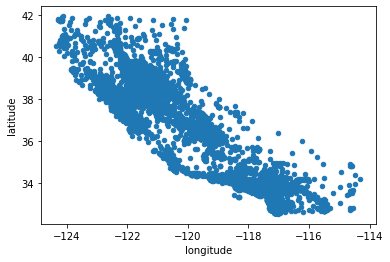

In [39]:
housing.plot(kind="scatter", x="longitude", y="latitude")

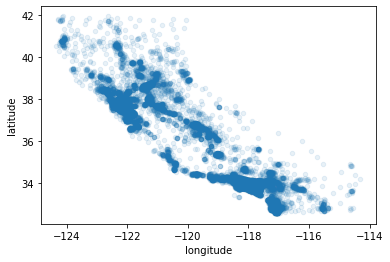

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)
# 밀집된 지역을 확인하기위해 alpha = 0.1 옵션을 줌

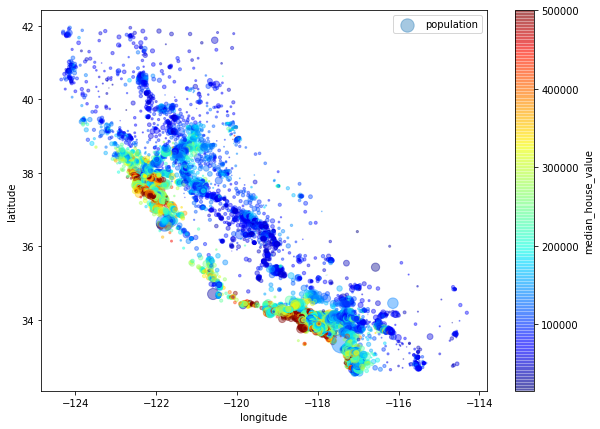

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
            s = housing["population"]/100, label="population", figsize=(10,7), #s, 원의 반지름은 해당 지역의 인구를 나타냄
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False) # c, 색깔은 가격을 나타낸다. 파란색은 낮은가격 빨간색은 높은가격을 표시해주는 cmap=plt.get_cmap("jet")옵션을 이용한다.
plt.legend()

#### 상관관계 조사

`표준 상관계수`

In [43]:
corr_matrix = housing.corr()

In [45]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AEDB8CF108>,
      dtype=object)

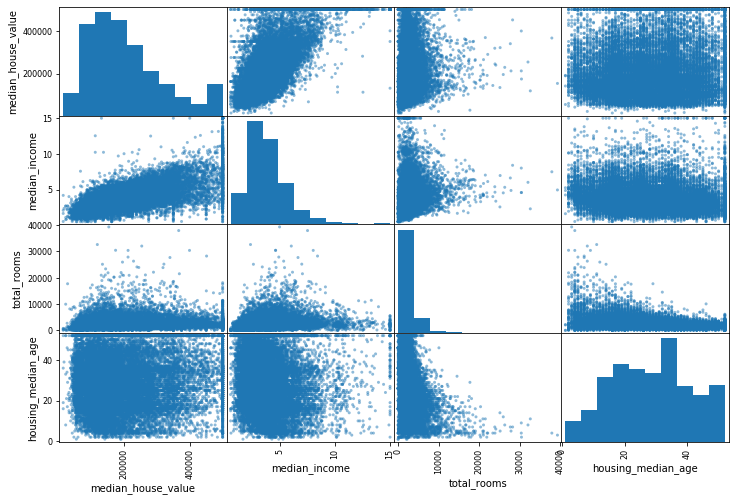

In [47]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

median_house_value를 예측하는데 median_income이 가장 유용할 것 같으므로 산점도를 확대해보자

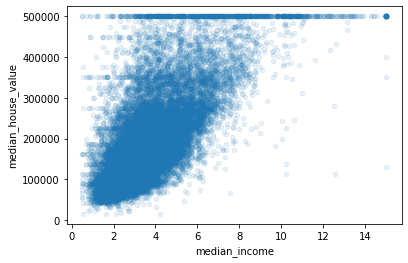

In [48]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

위 그래프의 특성
1. 양의 상관관계가 매우강함
2. 500000지점에서 수평으로 분포해있음
3. 450000, 350000 지점도 마찬가지로 수평적 분포가 보임

알고리즘이 데이터에서 이런 이상한 형태를 학습하지않도록 제거하는것이 좋아보인다

#### 특성조합으로 실험

In [49]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [50]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### 머신러닝 알고리즘을 위한 데이터 준비

이 작업은 수동으로 하는 대신 함수를 만들어 자동화 해야하는 이유가 있다.
1. 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있다.
2. 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축할 수 있다.
3. 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는데 이 함수를 사용할 수 있다.
4. 여러가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는데 편리하다.


In [51]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### 데이터 정제 

dropna()  
drop()  
fillna()  


In [52]:
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms",axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace =True)

사이킷런의 SimpleImputer는 누락된 값을 손쉽게 다룰 수 있도록 해준다. 

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기때문에 ocean_proximity를 제외한 복사본 생성

In [56]:
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [57]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [60]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [65]:
X = imputer.transform(housing_num)
type(X) ##imputer의 결과물은 평범한 numpy array이므로 pandas df로 돌려주자

numpy.ndarray

In [66]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index = list(housing.index.values))

In [68]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625
